In [75]:
from ekonlpy.tag import Mecab
import pandas as pd
import glob
from tqdm import tqdm
from ekonlpy.sentiment import MPCK
import re

In [2]:
mecab = Mecab()
mpck = MPCK()

In [60]:
# file_list = glob.glob('csvfile/*.csv')

In [61]:
# 3사의 뉴스를 다합치는 코드입니다

# with open('ALL_NEWS.csv', 'w', encoding='utf=8') as f:#인포맥스, 이데일리, 연합뉴스 다합치기
#     cn=0
#     for file in file_list:
#         cn+=1
        
#         df = pd.read_csv(file)
#         if cn==1:#첫번째에만 header를 넣었다
#             df.to_csv(f,index=False, header=True, encoding='utf-8')
#         else : 
#             df.to_csv(f,index=False, header=False, encoding='utf-8')
    

In [141]:
news_file.to_pickle('allnews_0729.pkl')
bond.to_pickle('bond_0729.pkl')

In [150]:
news_bond.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 221781 entries, 2005-05-01 to 2017-12-27
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   body    221761 non-null  object
dtypes: object(1)
memory usage: 3.4+ MB


In [151]:
news_bond_mkb = pd.concat([news_bond,mkb])
news_bond_mkb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 221929 entries, 2005-05-01 to 2005-05-12
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   body    221909 non-null  object
dtypes: object(1)
memory usage: 3.4+ MB


In [164]:
news_bond_mkb = news_bond_mkb.groupby('time').sum()
news_bond_mkb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4616 entries, 2005-05-01 to 2017-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   body    4596 non-null   object
dtypes: object(1)
memory usage: 72.1+ KB


In [22]:
from ekonlpy.sentiment import MPCK
mpck = MPCK()

# ngrams = mpck.ngramize(tokens)
# score = mpck.classify(tokens + ngrams, intensity_cutoff=1.5)

In [61]:
# from nltk import sent_tokenize
# for i in tqdm(range(len(news_file['body']))):
#     news_file['ngramize'][i] = mpck.ngramize(mpck.tokenize(sent_tokenize((news_file['body'][i]))    

100%|████████████████████████████████████████████████████████████████████████| 220125/220125 [1:25:46<00:00, 42.77it/s]


In [ ]:
# 기사 문장별 split 후 ngramize
ngram_list=[]
for i in tqdm(range(len(news_bond_mkb['body']))):
    sent_ngram=[]
    sent=sent_tokenize(news_bond_mkb['body'][i])
    for s in sent:
        ngrams = mpck.ngramize(mpck.tokenize(s),keep_overlapping_ngram=False)
        if ngrams:
            sent_ngram.append(ngrams)
    ngram_list.append(sent_ngram)
news_bond_mkb['ngram'] = ngram_list
# unigram 은 아예 단어장에 포함되지 않으므로 노력할 필요 없음

  6%|█████                                                                          | 299/4616 [02:49<39:20,  1.83it/s]

In [62]:
import pickle
news_file = news_file[['time','ngramize']]
news_set = news_file.groupby('time').sum()
news_set.to_pickle("news_set.pkl")
news_set.head()
# df = pd.read_pickle("df.pkl")
#뉴스기사 ngramize한 세트들 저장

In [127]:
mpb = pd.read_csv('MPB1.csv',header=None, names=['time','body1','body2'], parse_dates=['time'])
mpb.head()

,time,body1,body2
0,2017-11-30,['일부 위원은 최근 미국의 금융·경제상황을 보면 금년 12월 미 연준이 금리를 ...,NaN
1,2017-10-19,['일부 위원은 최근 미국에서는 임금상승세가 확대되고 세제개혁에 대한 기대 감이 ...,NaN
2,2017-08-31,['일부 위원은 미국의 금리 정상화 행보에도 불구하고 미 달러화가 약세기조를 지속...,NaN
3,2017-07-13,"['일부 위원은 주요국에서는 성장과 고용이 회복국면의 정점을 향해 가고 있음.', ...",NaN
4,2017-05-25,['일부 위원은 최근 국제금융시장이 안정된 모습을 지속하는 가운데 국내금융 시장도...,NaN


In [77]:

mpb = pd.read_csv('MPB.csv',parse_dates=['Unnamed: 0'])
mpb = mpb.rename(columns = {'Unnamed: 0':'time'})
mpb = mpb.set_index('time')
mpb.head()
# mpb['ngramize'] = [mpck.ngramize(mpck.tokenize(i)) for i in mpb['body']]
# mpb = mpb[['ngramize']]
mpb.sort_index(inplace=True)


In [113]:
BOK = mpb.merge(mkb, how='left', left_index=True, right_index=True)

In [ ]:
resul = pd.concat([news_set, mpb]) ##### mpb합치기
resul.info()
result = pd.concat([resul, bond])  ######## bond합치기
result.head()

result.reset_index(inplace=True)
result_set = result.groupby('time').sum()

result_set.to_pickle('result_set.pkl')

# result_set이 call금리랑 ngramize까지 합쳐서 완료된거

In [259]:
result_set.head()

,ngramize,up_down
time,,
2005-05-01,"[인플레이션/NNG;압력/NNG;억제/NNG, 금리/NNG;인상/NNG;긴축/NNG...",상승
2005-05-02,"[국제/NNG;유가/NNG;고공행진/NNG, 국제/NNG;유가/NNG;강세/NNG,...",상승
2005-05-03,"[fed/NNG;ff/NNG;금리/NNG;인상/NNG, 저점/NNG;경계/NNG, ...",상승
2005-05-04,"[금리/NNG;인상/NNG;가능성/NNG;줄/VV, 채권/NNG;금리/NNG;소폭/...",하락
2005-05-05,"[대출/NNG;한도/NNG;최대/NNG, 경기/NNG;둔화/NNG;우려/NNG;금리...",하락


In [ ]:
result_set = pd.read_pickle('result_set.pkl')

In [7]:
callrate = pd.read_csv('callrate_month_upanddown.csv')

callrate = callrate[30:4658][['date','up_down']]
callrate = callrate.rename(columns={'date':'time'})
callrate = callrate.set_index('time')
result_set = result_set.merge(callrate, left_index=True, right_index=True)
result_set.head()



,ngramize,up_down
time,,
2005-05-01,"[인플레이션/NNG;압력/NNG;억제/NNG, 금리/NNG;인상/NNG;긴축/NNG...",상승
2005-05-02,"[국제/NNG;유가/NNG;고공행진/NNG, 국제/NNG;유가/NNG;강세/NNG,...",상승
2005-05-03,"[fed/NNG;ff/NNG;금리/NNG;인상/NNG, 저점/NNG;경계/NNG, ...",상승
2005-05-04,"[금리/NNG;인상/NNG;가능성/NNG;줄/VV, 채권/NNG;금리/NNG;소폭/...",하락
2005-05-05,"[대출/NNG;한도/NNG;최대/NNG, 경기/NNG;둔화/NNG;우려/NNG;금리...",하락


In [9]:
result_set.to_pickle('result_set.pkl')

# 논문저자가 만든 ngram사전

In [88]:
vocab = pd.read_csv('mp_polarity_vocab.txt', delimiter=' ', header=None, names=['ngram','n'])
vocab

## 토큰수 세기

In [10]:
from collections import defaultdict

# 범주에 속하는 토큰수 세기 1(스팸), 0(정상))
haw_cnt = 0
dov_cnt = 0

# 토큰별로 문서내 빈도수 카운팅
wordfreq = defaultdict(lambda : [0, 0])

#label 0 이 hawkish   1은 dovish라 가정
for ngrams, label in zip(result_set['ngramize'], result_set['up_down']) :
    
    for ngram in ngrams:
        if label == '상승':
            wordfreq[ngram][0] += 1
        elif label == '하락':
            wordfreq[ngram][1] += 1

for key, (cnt0, cnt1) in wordfreq.items():
    haw_cnt += cnt0
    dov_cnt += cnt1

print('haw_cnt : {}'.format(haw_cnt))
print('dov_cnt : {}'.format(dov_cnt))

haw_cnt : 662080
dov_cnt : 750384


In [11]:
wordfreq2 = wordfreq.copy()

# del cur['key']

for key, value in wordfreq2.items():
    if sum(value)<15:
        del wordfreq[key]

In [12]:
len(wordfreq)

16534

In [13]:
haw_cnt = 0
dov_cnt = 0
for val in wordfreq.values():
    haw_cnt+=val[0]
    dov_cnt+=val[1]
    
print(haw_cnt, dov_cnt)

544975 620442


In [14]:

k=0.5
for key, val in wordfreq.items():
    val.append((k+val[0])/(2*k+haw_cnt))
    val.append((k+val[1])/(2*k+dov_cnt))
    val.append(val[2]/val[3])

In [16]:
wordfreq_origin = wordfreq.copy()
for key, val in wordfreq.items():
    if val[4]>1.3:
        wordfreq[key]=1
    else if val[4] < 1/1.3:
        wordfreq[key]=-1

In [17]:
wordfreq['인플레이션/NNG;압력/NNG;억제/NNG']

1

In [24]:
mpb.sort_index(inplace=True)

# mpb 문장별로 계산

In [104]:

a = []
b = list(map(abs,a))
b

[]

In [26]:
import numpy as np
mpb['tone']=0
polar=[]
for i, doc in enumerate(mpb['ngramize']):
    
    sentence_score=[]
    for sentence in doc:
        
        plus=0
        minus=0
        for ngram in sentence:
            if ngram in wordfreq:
                minus += wordfreq[ngram]
                plus += np.abs(wordfreq[ngram])
            
        
        if plus!=0:
            if minus/plus>0:
                sentence_score.append(1)
            elif minus/plus<0:
                sentence_score.append(-1)
    if setence_score:
        polar = sum(sentence_score)/sum(list(map(abs(sentence_score))))
    else : polar =0
    polar.append

In [27]:
mpb['tone'] = polar

## tone값구한거 저장해주세요 version 이름 바꿔서

In [29]:
##version name을 적어주세요
mpb.to_pickle('mpb_tone_v1')

# - 여기부터 tone하고 전체기간기준금리 합쳐서 결과값내는거임

In [19]:
rate = pd.read_pickle('전체기간_기준금리.pkl')

#tone 불러오기
tone = pd.read_pickle('mpb_tone_v1.pkl')

In [25]:
tone_rate = tone.merge(rate, left_index=True, right_index=True, how='left' )

In [26]:
tone_rate.head()

,ngramize,tone,base_rate
time,,,
2005-05-12,"[해외/NNG;증권/NNG;투자/NNG;늘/VV, 내외/NNG;금리갭/NNG;축소/...",0.000000,3.5
2005-06-09,"[엔달러/NNG;환율/NNG;상승/NNG, 유로존/NNG;경제/NNG;성장/NNG,...",0.600000,3.5
2005-07-07,"[해외/NNG;증권/NNG;투자/NNG;증가/NNG, 해외/NNG;증권/NNG;투자...",-0.333333,3.5
2005-08-11,"[자본/NNG;유출/NNG;가능성/NNG;낮/VA, 금융시장/NNG;위안/NNG;절...",-0.090909,3.5
2005-09-08,"[금리/NNG;인상/NNG;장기/NNG;금리/NNG;상승/NNG, fed/NNG;단...",-0.333333,3.5


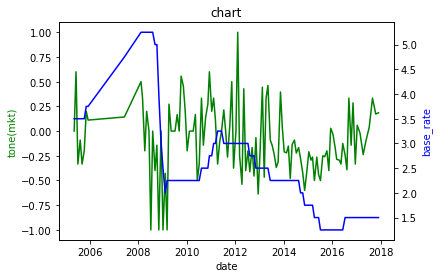

In [27]:
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots()  #보조축 차트 만들기

ax1.set_xlabel('date')

ax1.set_ylabel('tone(mkt)', color='g')  #라인차트 컬러 지정

ax1.plot(tone_rate['tone'], 'g-')  #라인차트 형태 지정

ax2 = ax1.twinx()  #보조축을 위한 X축 공유 지정

ax2.plot(tone_rate['base_rate'], 'b-')

ax2.set_ylabel('base_rate', color='b')

plt.title('chart')

# plt.grid()

# fig.tight_layout()

plt.show()

In [28]:
tone_rate[['tone','base_rate']].corr()

,tone,base_rate
tone,1.000000,0.106291
base_rate,0.106291,1.000000
